In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D


---
# Projections in R^2
---


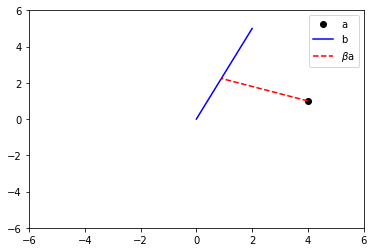

In [37]:

# point b
b = np.array([4,1])

# line a
a = np.array([ 2, 5 ])

# beta
beta = (np.matrix.transpose(a)@b) / (np.matrix.transpose(a)@a)

# draw!
plt.plot(b[0],b[1],'ko',label='a')
plt.plot([0, a[0]],[0, a[1]],'b',label='b')

# now plot projection line
plt.plot([b[0], beta*a[0]],[b[1], beta*a[1]],'r--',label=r'$\beta$a')

plt.legend()
plt.axis((-6, 6, -6, 6))

plt.show()



---
# Projections in R^N
---


In [70]:
## the goal here is to solve Ax=b for x

# sizes
m = 16
n = 10

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)

# solution using explicit inverse
x1 = np.linalg.inv(np.matrix.transpose(A)@A) @ (np.matrix.transpose(A)@b)

# python solution
x2 = np.linalg.solve(np.matrix.transpose(A)@A,np.matrix.transpose(A)@b)

# show that the results are the same
print([x1,x2])

[array([[ 0.04300659],
       [ 0.26754913],
       [-0.06014352],
       [ 0.12449534],
       [ 0.22034985],
       [ 0.48824341],
       [-0.1392694 ],
       [ 0.01489262],
       [ 0.07114596],
       [ 0.3592569 ]]), array([[ 0.04300659],
       [ 0.26754913],
       [-0.06014352],
       [ 0.12449534],
       [ 0.22034985],
       [ 0.48824341],
       [-0.1392694 ],
       [ 0.01489262],
       [ 0.07114596],
       [ 0.3592569 ]])]


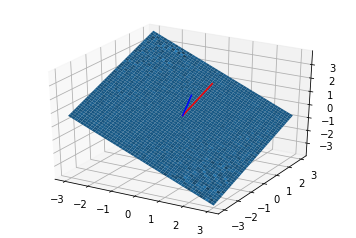

In [71]:
## geometric perspective in R^3

# matrix sizes
m = 3
n = 2

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)


# solution
x = np.linalg.solve(np.matrix.transpose(A)@A,np.matrix.transpose(A)@b)
Ax = A@x


## plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot([0, b[0]],[0, b[1]],[0, b[2]],'r')
ax.plot([0, Ax[0]],[0, Ax[1]],[0, Ax[2]],'b')

# now draw plane
xx, yy = np.meshgrid(np.linspace(-3,3), np.linspace(-3,3))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1)

plt.show()


---
# Orthogonal and parallel vector components
---


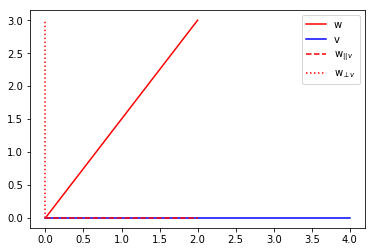

In [84]:
# vector w, to be decomposed
w = np.array([ 2, 3 ])

# vector v, the reference
v = np.array([ 4, 0 ])

# compute parallel component first
beta = (np.matrix.transpose(w)@v)/(np.matrix.transpose(v)@v) # the projection scalar
w_par_v = beta*v     # scaled vector v

# then compute orthogonal component
w_perp_v = w - w_par_v


# and make a nice plot
plt.plot([0, w[0]],[0, w[1]],'r',label='w')
plt.plot([0, v[0]],[0, v[1]],'b',label='v')

# now components
plt.plot([0, w_par_v[0]], [0, w_par_v[1]], 'r--',label='w$_{||v}$')
plt.plot([0, w_perp_v[0]],[0, w_perp_v[1]],'r:',label='w$_{\perp v}$')

plt.legend()
plt.show()


---
# Gram-Schmidt orthogonalization and QR decomposition
---


[[-3.16227766  0.63245553 -0.31622777]
 [ 0.         -1.26491106  2.21359436]]
[[ -3.16227766e+00   6.32455532e-01  -3.16227766e-01]
 [  2.22044605e-16  -1.26491106e+00   2.21359436e+00]]
[[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]]


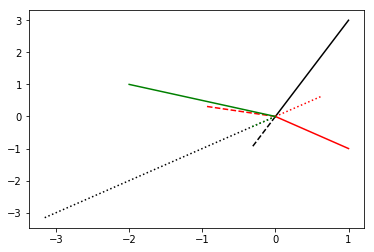

In [121]:
# the to-be-decomposed matrix
M = np.array([ [1,1,-2],[3,-1,1] ])

# QR decomposition
[Q,R] = np.linalg.qr(M)

# notice:
print(R)
print(np.matrix.transpose(Q)@M)
print(Q)


# plot
colorz = 'krg'
for i in range(0,3):
    # plot original vector M
    plt.plot([0,M[0,i]],[0,M[1,i]],colorz[i])
    
    # plot residual vector R
    plt.plot([0,R[0,i]],[0,R[0,i]],':',color=colorz[i])
    
    # plot orthogonalized vector Q
    if i<2:
        plt.plot([0,Q[0,i]],[0,Q[1,i]],'--',color=colorz[i])
    
plt.show()